## Copying dataset to my own drive using shortcut

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/MyDrive/additional info

/gdrive/.shortcut-targets-by-id/1v55aqdaG8xqSPW7Qdnf5tYNDSOTUZyzS/additional info


In [ ]:
!pwd

/gdrive/.shortcut-targets-by-id/1v55aqdaG8xqSPW7Qdnf5tYNDSOTUZyzS/additional info


In [ ]:
!!cp -r '/gdrive/.shortcut-targets-by-id/1v55aqdaG8xqSPW7Qdnf5tYNDSOTUZyzS/additional info/.' '/gdrive/My Drive/HPC'

[]

## Loading data

In [ ]:
!pip install scipy

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd /gdrive/MyDrive/

/gdrive/MyDrive


In [ ]:
!pwd

/gdrive/MyDrive


In [ ]:
!ls

'2025 conference DDL (NJIT XU Lab).gsheet'
'2 10.pptx'
 644milestone1.gdoc
'644 report.gdoc'
 732pre.gdoc
'Big Data Challenges and Solutions in super bowl.gdoc'
 cheche.gsheet
 code.gdoc
'Colab Notebooks'
 demo1.mp4
 Final_Fall2024.docx
 HPC
 Konpa_Night_Flyer_2.jpeg
'milestone 2 - Yiran Huang.gdoc'
'NJIT Template.gform'
'paper list.gdoc'
'pre seq2seq - Made with Clipchamp_1713758103167.mp4'
 README_data_static.rtf.gdoc
 result.gdoc
'Screen Shot 2024-06-10 at 1.10.01 AM.png'
 sub1_yeo100_ts4800_std.gsheet
 TA_01.csv
 text.csv
'Untitled document (1).gdoc'
'Untitled document.gdoc'
'Yiran pre 732.mp4'


In [ ]:
!pip install h5py

In [3]:
import scipy.io
import numpy as np
import h5py
mat_data = h5py.File("./HPC/hcp1003_RestALL_Schaefer_tcCLEAN.mat", "r")


In [ ]:
print(mat_data.keys())
for key in mat_data:
    if not key.startswith("__"):  # Ignore system metadata keys
        print(f"Variable: {key}, Type: {type(mat_data[key])}, Shape: {mat_data[key].shape if isinstance(mat_data[key], np.ndarray) else 'N/A'}")


<KeysViewHDF5 ['#refs#', 'FCmats', 'badcomponents', 'tc_clean', 'tc_std']>
Variable: #refs#, Type: <class 'h5py._hl.group.Group'>, Shape: N/A
Variable: FCmats, Type: <class 'h5py._hl.dataset.Dataset'>, Shape: N/A
Variable: badcomponents, Type: <class 'h5py._hl.dataset.Dataset'>, Shape: N/A
Variable: tc_clean, Type: <class 'h5py._hl.dataset.Dataset'>, Shape: N/A
Variable: tc_std, Type: <class 'h5py._hl.dataset.Dataset'>, Shape: N/A


In [4]:
key_name = "FCmats"  # Replace with actual variable name
print(mat_data[key_name])  # Print entire variable (if small)
# print(mat_data[key_name][0])  # Print first 5 elements (if large)
FC_mats = mat_data[key_name]
print(FC_mats.shape)

<HDF5 dataset "FCmats": shape (92, 92, 4, 1001), type "<f8">
(92, 92, 4, 1001)


In [ ]:
key_name = "badcomponents"  # Replace with actual variable name
print(mat_data[key_name])  # Print entire variable (if small)
print(mat_data[key_name][:1])  # Print first 5 elements (if large)

<HDF5 dataset "badcomponents": shape (8, 1), type "<f8">
[[9.]]


In [5]:
key_name = "tc_clean"  # Replace with actual variable name
print(mat_data[key_name])  # Print entire variable (if small)
#print(mat_data[key_name][:1])  # Print first 5 elements (if large)

# Select the variable
tc_clean = mat_data[key_name]

# Check shape and type
print(f"Shape: {tc_clean.shape}, Type: {tc_clean.dtype}")

# Check the first reference
first_ref = tc_clean[0, 0]  # Access first HDF5 object reference
print("First reference type:", type(first_ref))

# If it's an object reference, get its name in the HDF5 file
if isinstance(first_ref, h5py.Reference):
    obj = mat_data[first_ref]  # Dereference
    print("Dereferenced object type:", type(obj))
    print("Shape of the object:", obj.shape)
    # print("First few values:", obj[:5])  # Print actual data

num_sessions, num_subjects =  tc_clean.shape
ts_data = [[np.array(mat_data[ref]) for ref in tc_clean[i]] for i in range(num_sessions)]
ts_data = np.transpose(ts_data, (1, 0, 2, 3)) # --> [subjects, sessions, regions, timepoints]
print("Shape of the ts_data:", np.array(ts_data).shape)

<HDF5 dataset "tc_clean": shape (4, 1003), type "|O">
Shape: (4, 1003), Type: object
First reference type: <class 'h5py.h5r.Reference'>
Dereferenced object type: <class 'h5py._hl.dataset.Dataset'>
Shape of the object: (92, 1200)
Shape of the ts_data: (1003, 4, 92, 1200)


In [ ]:
key_name = "tc_std"  # Replace with actual variable name
print(mat_data[key_name])  # Print entire variable (if small)
print(mat_data[key_name][:1])  # Print first 5 elements (if large)

<HDF5 dataset "tc_std": shape (4, 1003), type "|O">
[[<HDF5 object reference> <HDF5 object reference> <HDF5 object reference>
  ... <HDF5 object reference> <HDF5 object reference>
  <HDF5 object reference>]]


# Visualization

## FC matrix for each subject with 4 sessions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import h5py
import os

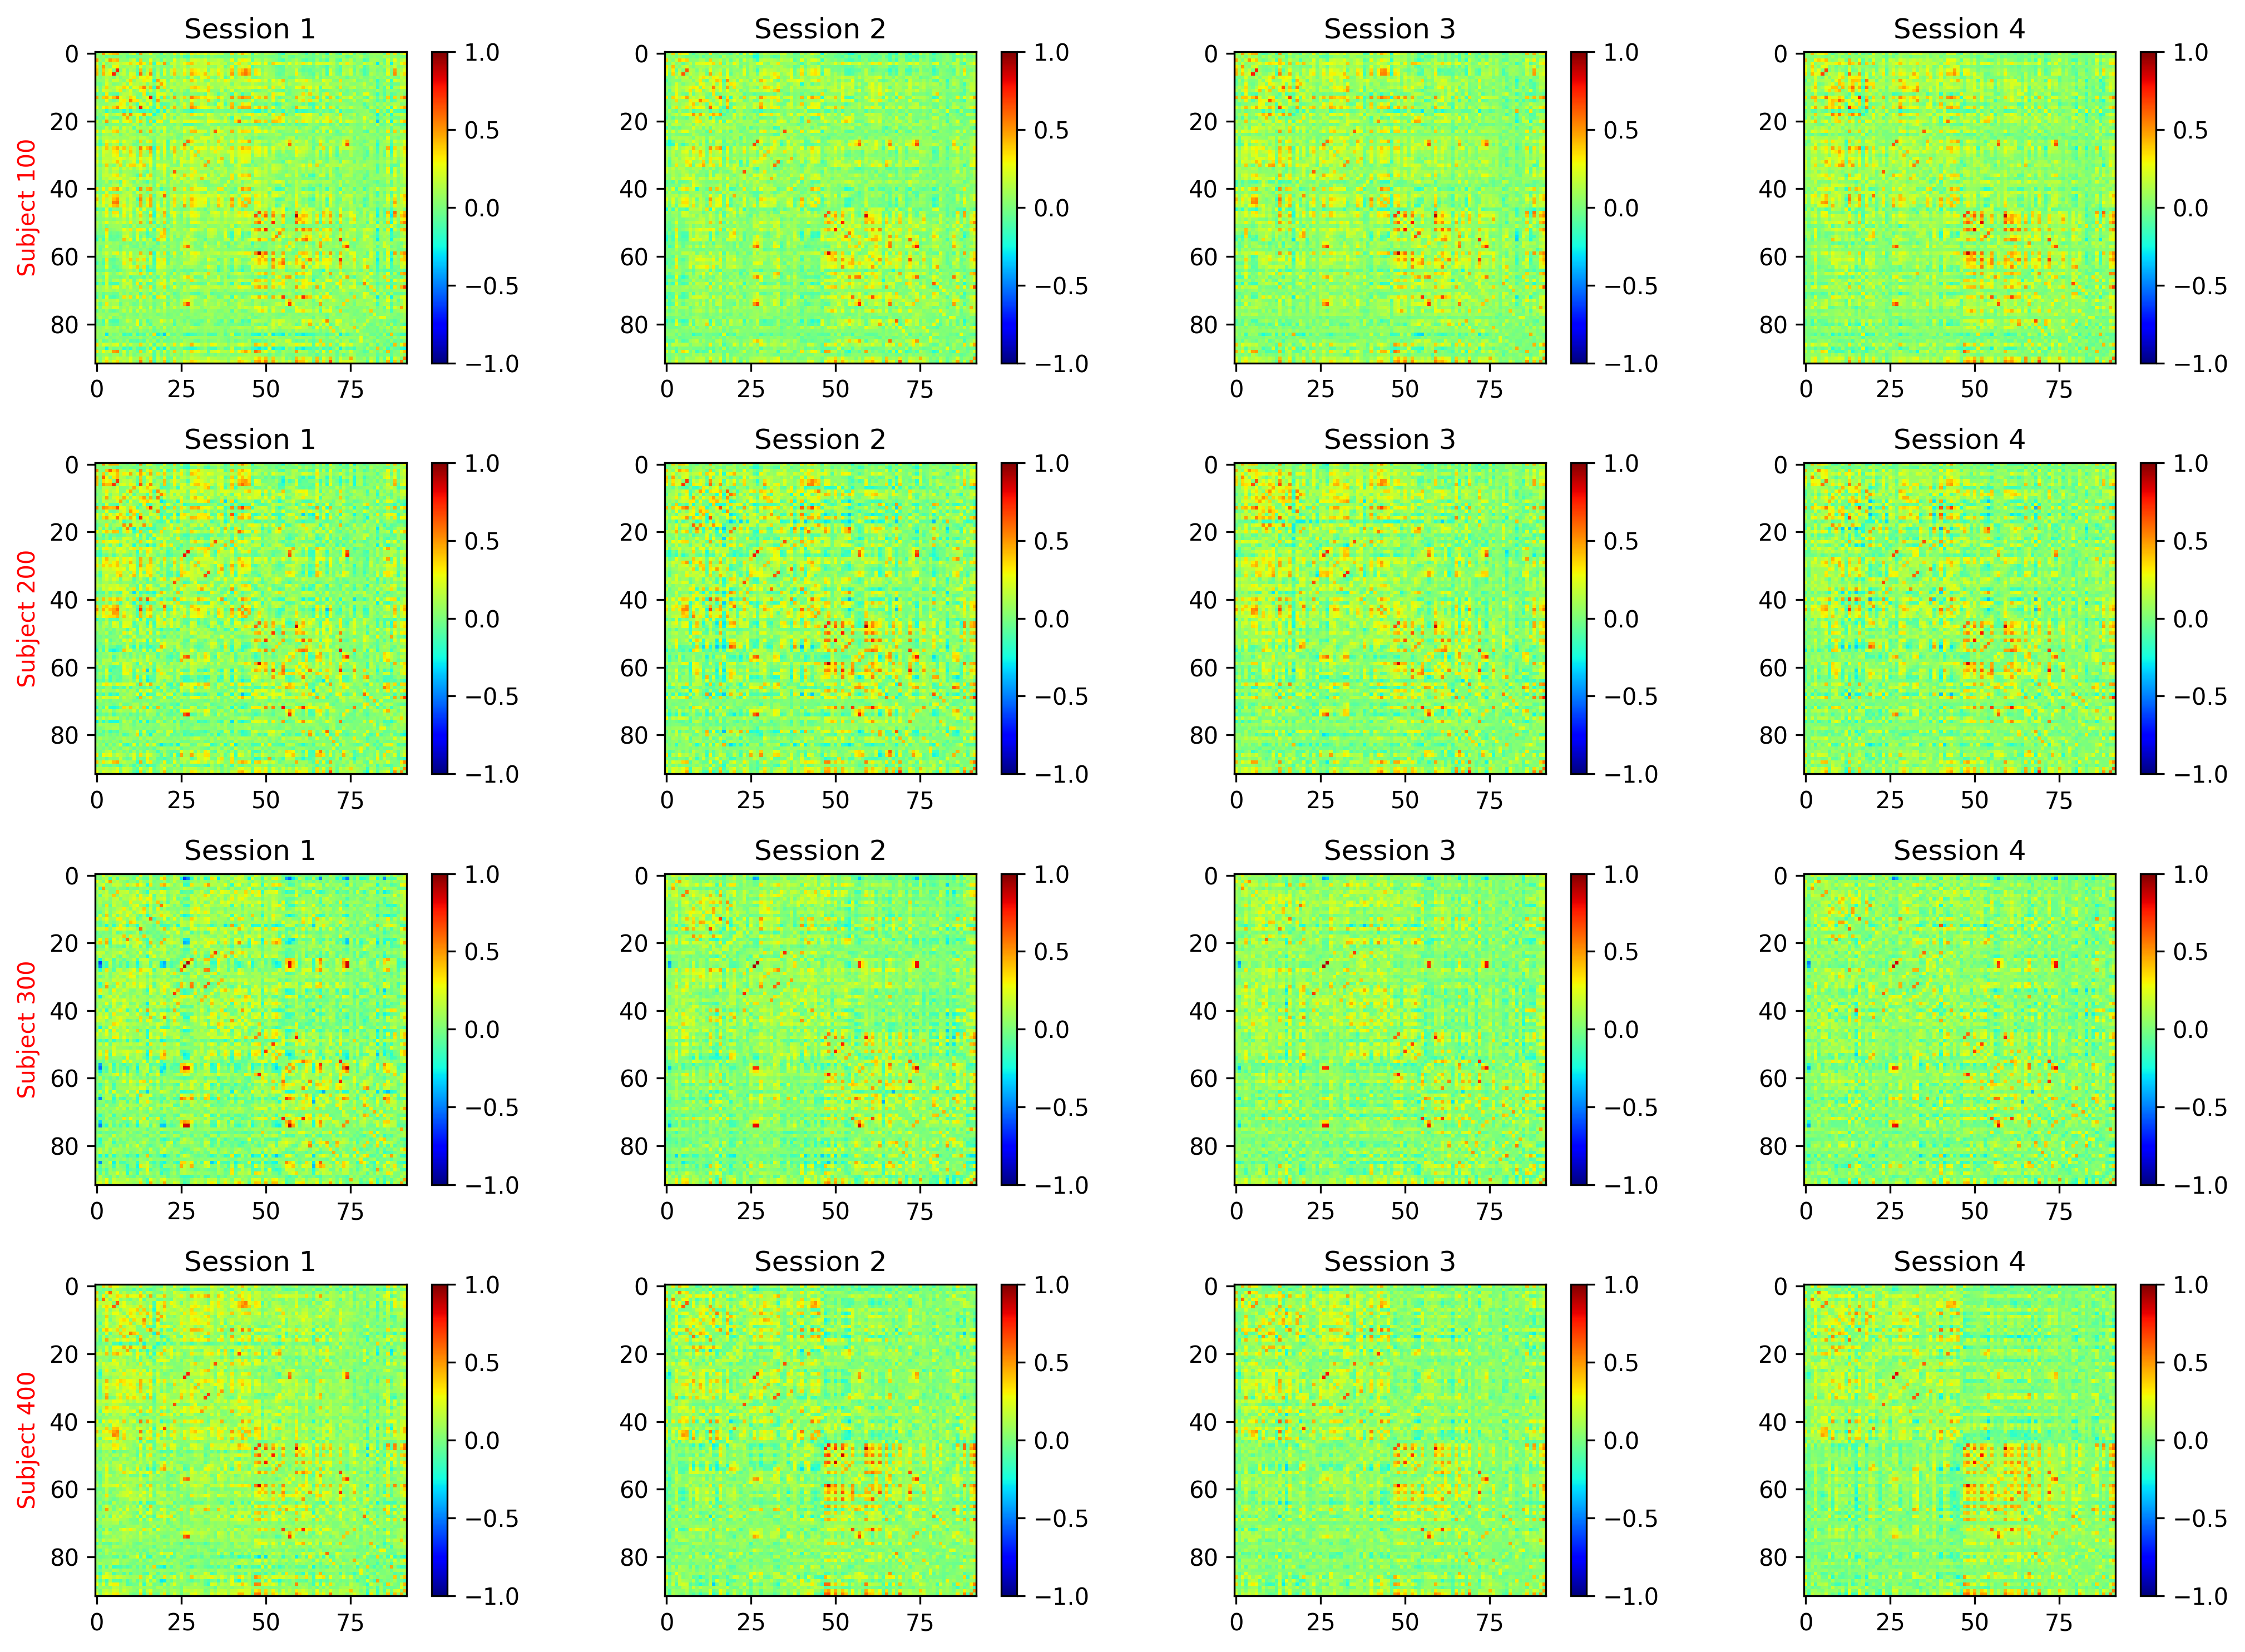

In [ ]:
SS = [100, 200, 300, 400] # subject indices
plt.figure(figsize=[14, 10], dpi=300)
for s in range(len(SS)):
    for i in range(4):
        plt.subplot(4, 4, s*4 + i + 1)
        plt.imshow(FC_mats[:, :, i, SS[s]-1], cmap='jet', vmin=-1, vmax=1)
        plt.colorbar()
        plt.title(f'Session {i+1}')
        if i == 0:
            plt.ylabel(f'Subject {SS[s]}', color='red')
plt.tight_layout()
plt.show()

## BOLD time series

Total data size: (1003, 4, 92, 1200)
(92,)
Stable ROI IDs: [33 88 54 84 23]
Dynamic ROI IDs: [90 78 71 83 85]


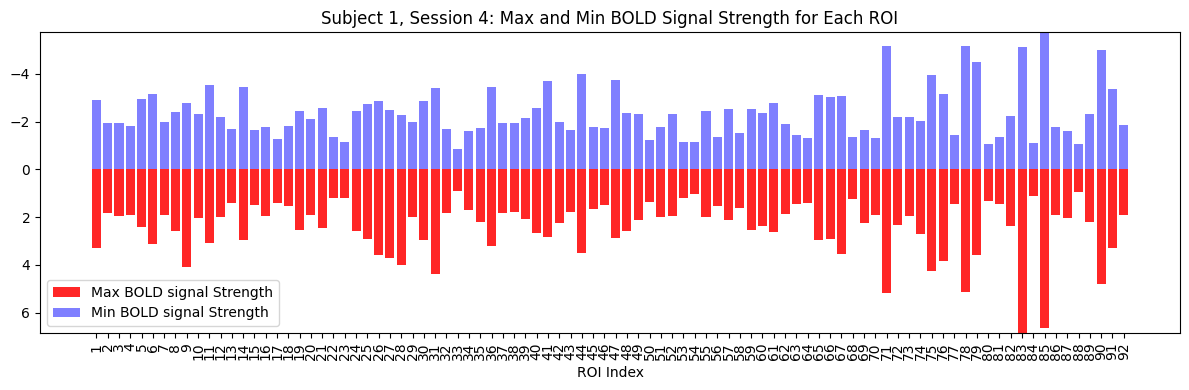

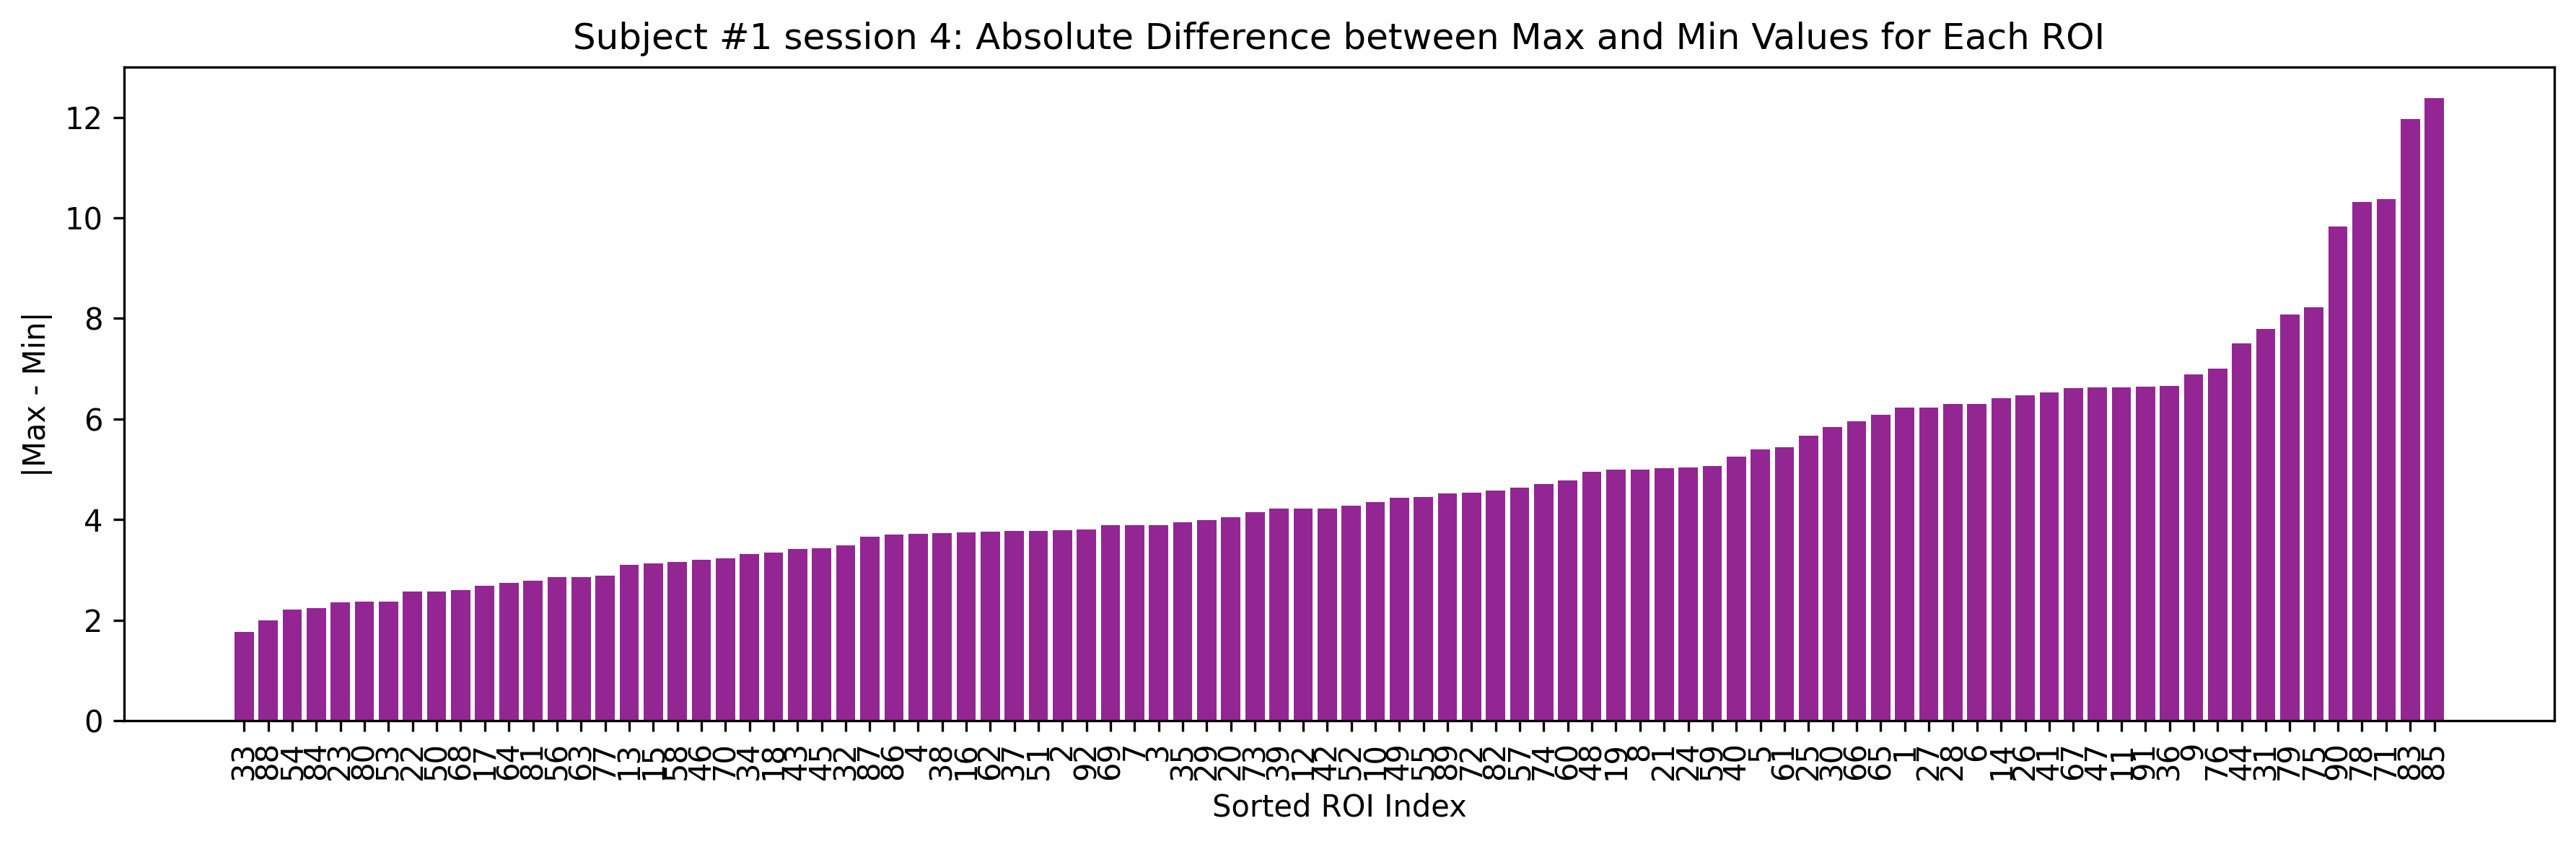

In [ ]:
print('Total data size:', ts_data.shape)
ss = 3
plt.figure(figsize=[12, 4], dpi=100)
max_vals =np.array([ts_data[0][ss][i].max() for i in range(92)])
min_vals =np.array([ts_data[0][ss][i].min() for i in range(92)])
plt.bar(np.arange(92), max_vals, color='red', alpha=0.85)
plt.bar(np.arange(92), min_vals, color='blue', alpha=0.5)
plt.xticks(np.arange(92), np.arange(1, 93), rotation=90)
plt.xlabel('ROI Index')
plt.legend(['Max BOLD signal Strength', 'Min BOLD signal Strength'])
plt.ylim([max_vals.max(), min_vals.min()])
plt.title(f'Subject 1, Session {ss+1}: Max and Min BOLD Signal Strength for Each ROI')
plt.tight_layout()

# Calculate the absolute difference between max and min values for each ROI's BOLD signal
abs_diff = np.abs(np.array(max_vals) - np.array(min_vals))
print(abs_diff.shape)
# Sort the absolute differences and get the sorted indices
sorted_indices = np.argsort(abs_diff)

# Plot the sorted absolute differences
plt.figure(figsize=[12, 4], dpi=300)
plt.bar(np.arange(len(abs_diff)), abs_diff[sorted_indices], color='purple', alpha=0.85)
plt.xticks(np.arange(len(abs_diff)), sorted_indices + 1, rotation=90)
plt.xlabel('Sorted ROI Index')
plt.ylabel('|Max - Min|')
plt.title(f'Subject #1 session {ss+1}: Absolute Difference between Max and Min Values for Each ROI')
plt.tight_layout()


print('Stable ROI IDs:', sorted_indices[:5]+1)
print('Dynamic ROI IDs:', sorted_indices[-5:]+1)

In [ ]:
!pip install ace_tools

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_sessions = 4
num_rois = 92
stable_dynamic_results = []

for ss in range(num_sessions):
    max_vals = np.array([ts_data[9][ss][i].max() for i in range(num_rois)])
    min_vals = np.array([ts_data[9][ss][i].min() for i in range(num_rois)])

    abs_diff = np.abs(max_vals - min_vals)

    sorted_indices = np.argsort(abs_diff)

    stable_rois = sorted_indices[:5] + 1
    dynamic_rois = sorted_indices[-5:] + 1

    stable_dynamic_results.append([ss + 1, list(stable_rois), list(dynamic_rois)])

print("\nStable and Dynamic ROIs for Subject 10 across Sessions:\n")
for session, stable, dynamic in stable_dynamic_results:
    print(f"Session {session}:")
    print(f"  Stable ROIs: {stable}")
    print(f"  Dynamic ROIs: {dynamic}\n")


Stable and Dynamic ROIs for Subject 10 across Sessions:

Session 1:
  Stable ROIs: [54, 88, 80, 33, 68]
  Dynamic ROIs: [90, 71, 78, 83, 85]

Session 2:
  Stable ROIs: [33, 54, 88, 80, 68]
  Dynamic ROIs: [83, 71, 90, 78, 85]

Session 3:
  Stable ROIs: [88, 54, 33, 80, 68]
  Dynamic ROIs: [90, 78, 83, 71, 85]

Session 4:
  Stable ROIs: [33, 88, 54, 80, 68]
  Dynamic ROIs: [90, 78, 71, 83, 85]



In [ ]:
from collections import Counter

num_subjects = 1003
num_sessions = 4
num_rois = 92

stable_roi_counts = [Counter() for _ in range(num_sessions)]
dynamic_roi_counts = [Counter() for _ in range(num_sessions)]

for subj in range(num_subjects):
    for ss in range(num_sessions):

        max_vals = np.array([ts_data[subj][ss][i].max() for i in range(num_rois)])
        min_vals = np.array([ts_data[subj][ss][i].min() for i in range(num_rois)])

        abs_diff = np.abs(max_vals - min_vals)

        sorted_indices = np.argsort(abs_diff)

        stable_rois = sorted_indices[:5] + 1
        dynamic_rois = sorted_indices[-5:] + 1

        stable_roi_counts[ss].update(stable_rois)
        dynamic_roi_counts[ss].update(dynamic_rois)

session_results = []

for ss in range(num_sessions):
    most_common_stable = [roi for roi, _ in stable_roi_counts[ss].most_common(5)]
    most_common_dynamic = [roi for roi, _ in dynamic_roi_counts[ss].most_common(5)]
    session_results.append((ss + 1, most_common_stable, most_common_dynamic))

print("\nMost Frequent Stable and Dynamic ROIs Across Subjects:\n")
for session, stable, dynamic in session_results:
    print(f"Session {session}:")
    print(f"  Most Frequent Stable ROIs: {stable}")
    print(f"  Most Frequent Dynamic ROIs: {dynamic}\n")


Most Frequent Stable and Dynamic ROIs Across Subjects:

Session 1:
  Most Frequent Stable ROIs: [54, 33, 80, 88, 68]
  Most Frequent Dynamic ROIs: [83, 85, 78, 90, 75]

Session 2:
  Most Frequent Stable ROIs: [54, 33, 88, 80, 68]
  Most Frequent Dynamic ROIs: [83, 85, 78, 90, 71]

Session 3:
  Most Frequent Stable ROIs: [54, 33, 80, 88, 68]
  Most Frequent Dynamic ROIs: [83, 85, 78, 90, 71]

Session 4:
  Most Frequent Stable ROIs: [54, 33, 88, 80, 68]
  Most Frequent Dynamic ROIs: [85, 83, 78, 90, 71]



### Schaefer atlas information

In [ ]:
!pwd

/gdrive/MyDrive


In [ ]:
# Load the brain atlas labels with additional columns
import pandas as pd

df = pd.read_csv('./HPC/Schaefer2018_100Parcels_17Networks_order_info.txt', sep='\t', header=None)
data = np.array(df)
labels = data[0::2] # extract "roi names, left or right hemisphere, and subnetwork names"
extra_data = np.array([i[0].split(' ') for i in data[1::2]]) # extract "roi id, {x, y, z}, and color info"

badROIs = [9,14,43,60,61,78,89,93] # 8 regions with bad data

# labels = np.delete(labels, badROIs) # remove the bad ROIs
# extra_data = np.delete(extra_data, badROIs, axis=0) # remove the bad ROIs
# print(labels.shape)
# print(extra_data.shape)

### Note that in schaefer atlas, the region names are not explicitly given:
# e.g., ['LH', 'SomMotA', '2'], there is no explicit region name, only the hemisphere, subnetwork, and parcel index.
split_labels=[]
for label in labels:
    parts = label[0].split('_')[1:]
    if len(parts)==4:
        split_labels.append(parts)
    if len(parts) < 4: # some regions have no name info
        print('Region name is not explicitly given:', label)
        parts.insert(2, 'roi')
        split_labels.append(parts)

df_1 = pd.DataFrame(split_labels, columns=['Hemisphere', 'Subnetwork', 'Region', 'Parcel index'])
df_2 = pd.DataFrame(extra_data, columns=['ROI ID', 'X', 'Y', 'Z', 'Color'])

# Merge df and df_atlas by extending columns
df_atlas = pd.concat([df_1, df_2], axis=1)
df_atlas.drop([i-1 for i in badROIs], inplace=True)   #drop bad ROIs from the 100 regions.
df_atlas.reset_index(drop=True, inplace=True)
df_atlas.to_excel('Schaefer2018_92Parcels_17Networks_order_info.xlsx', index=False)
df_atlas

Region name is not explicitly given: ['17Networks_LH_SomMotA_1']
Region name is not explicitly given: ['17Networks_LH_SomMotA_2']
Region name is not explicitly given: ['17Networks_LH_TempPar_1']
Region name is not explicitly given: ['17Networks_RH_SomMotA_1']
Region name is not explicitly given: ['17Networks_RH_SomMotA_2']
Region name is not explicitly given: ['17Networks_RH_SomMotA_3']
Region name is not explicitly given: ['17Networks_RH_SomMotA_4']
Region name is not explicitly given: ['17Networks_RH_TempPar_1']
Region name is not explicitly given: ['17Networks_RH_TempPar_2']
Region name is not explicitly given: ['17Networks_RH_TempPar_3']


,Hemisphere,Subnetwork,Region,Parcel index,ROI ID,X,Y,Z,Color
0,LH,VisCent,ExStr,1,1,120,18,136,255
1,LH,VisCent,ExStr,2,2,120,18,137,255
2,LH,VisCent,Striate,1,3,120,18,138,255
3,LH,VisCent,ExStr,3,4,120,18,139,255
4,LH,VisPeri,ExStrInf,1,5,255,0,2,255
...,...,...,...,...,...,...,...,...,...
87,RH,DefaultC,Rsp,1,96,5,0,131,255
88,RH,DefaultC,PHC,1,97,5,0,132,255
89,RH,TempPar,roi,1,98,16,48,255,255
90,RH,TempPar,roi,2,99,13,41,250,255


array(['RH', 'DorsAttnA', 'ParOcc', '1'], dtype=object)

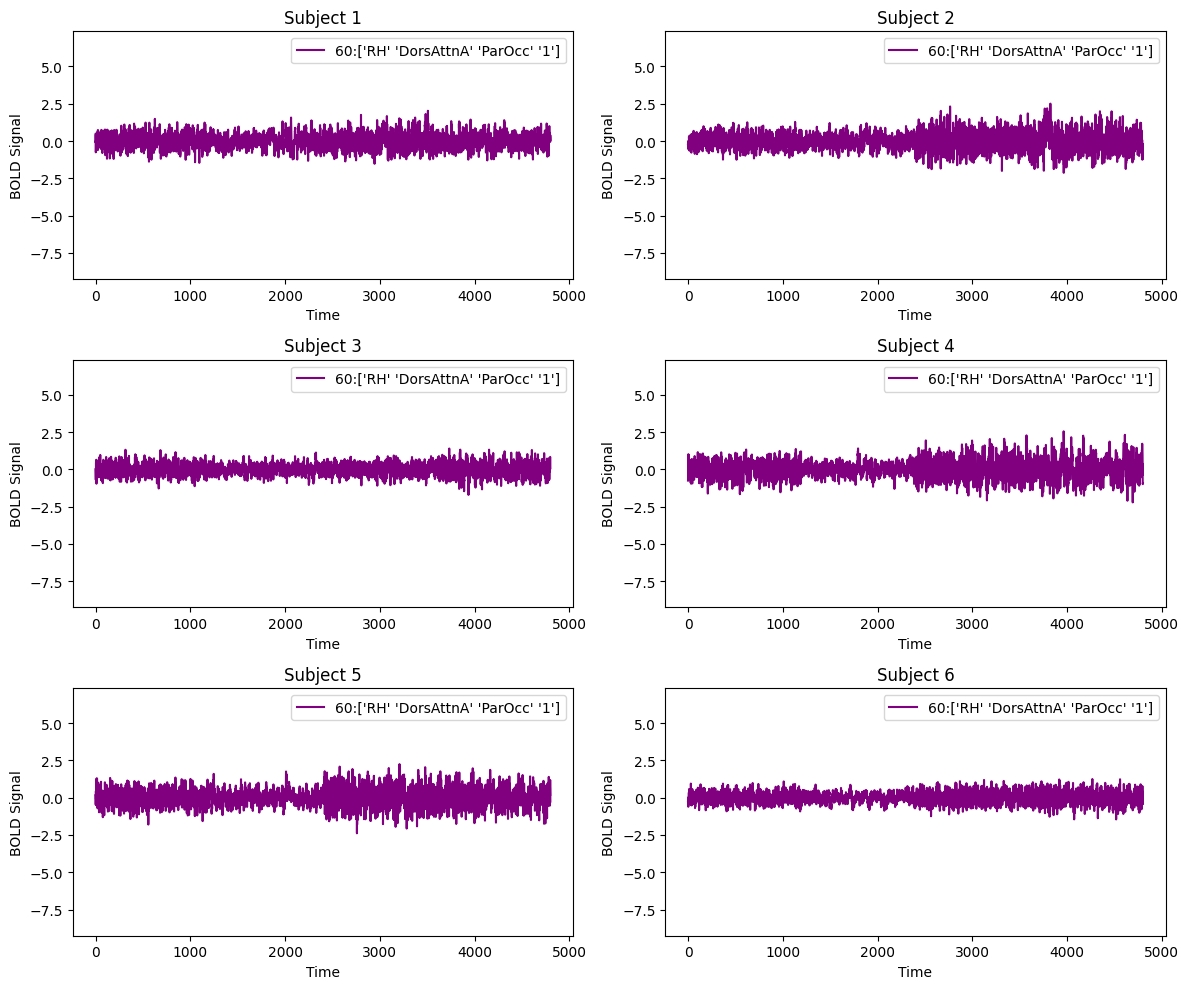

In [ ]:
global_min = np.min([reshaped_data.min() for reshaped_data in ts_data[:6].reshape(6, 92, 1200 * 4)])
global_max = np.max([reshaped_data.max() for reshaped_data in ts_data[:6].reshape(6, 92, 1200 * 4)])

plt.figure(figsize=[12,10],dpi = 100)
r_id = 60 # roi index    # 0, 20, 47,

df_atlas.iloc[r_id,]
for sub_id in range(6): #  6 subjects
    reshaped_data = ts_data[sub_id].reshape(92, 1200 * 4).T    # reshape signals from [4, 92, 1200] to [4800, 92]
    plt.subplot(3,2,sub_id+1)
    plt.plot(reshaped_data[:,r_id], 'purple')
    plt.ylim(global_min-.5, global_max+.5) # normalize y-range
    plt.xlabel('Time')
    plt.ylabel('BOLD Signal')
    plt.title(f'Subject {sub_id+1}')
    plt.legend([f'{r_id}:{df_atlas.iloc[r_id,:4].values}'])
plt.tight_layout()

df_atlas.iloc[r_id,:4].values

(1003, 4, 92, 1200)


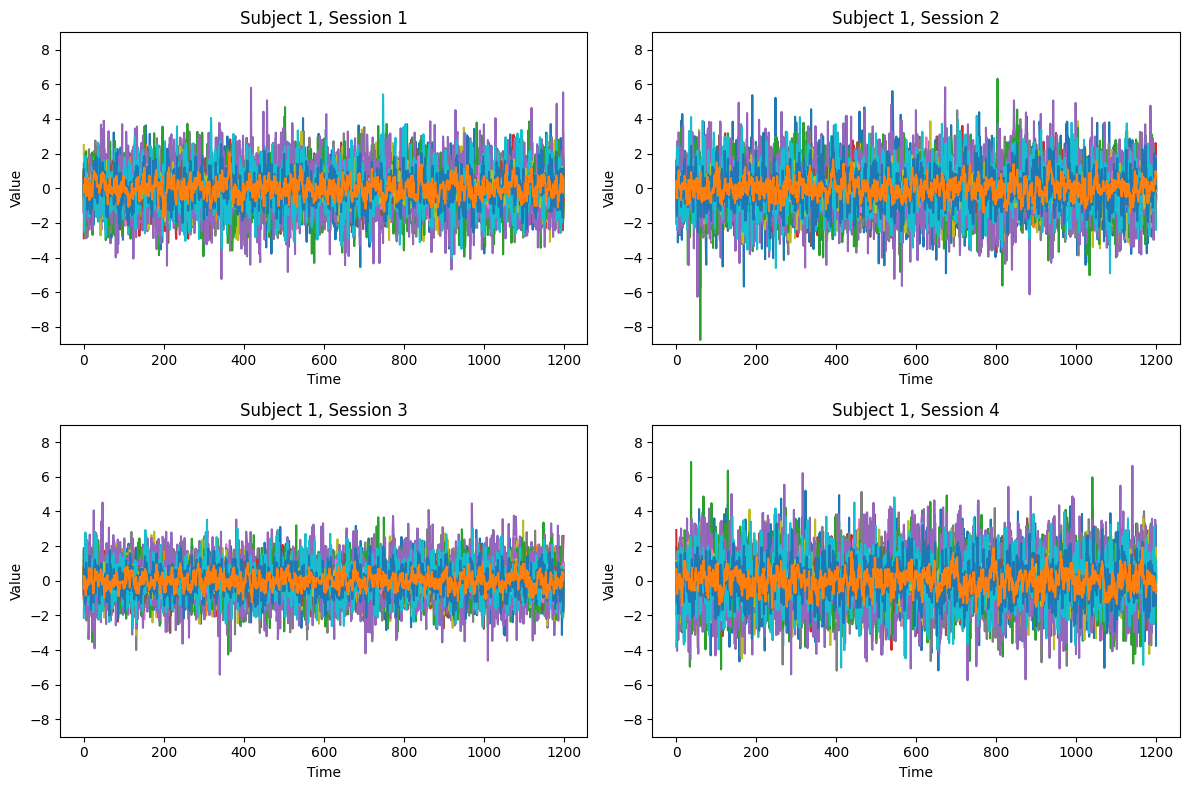

In [ ]:
'''visualize single subject's BOLD signals across 4 sessions'''

def plot_subject_fMRI_data(sub_id, ts_data):
    plt.figure(figsize=(12, 8))
    for s in range(4):
        plt.subplot(2,2, s+1)
        for i in range(ts_data[sub_id][s].shape[0]):
            sns.lineplot(data=ts_data[sub_id][s][i])
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.ylim([-9, 9])
        plt.title(f'Subject {sub_id+1}, Session {s+1}')

    plt.tight_layout()

# ts_data: [1003, 4, 92, 1200]
print(ts_data.shape)
plot_subject_fMRI_data(0, ts_data)
# plot_subject_fMRI_data(1, ts_data)

In [ ]:
exceeding_rois_per_session = {}
sub_id = 0
for s in range(num_sessions):
    exceeding_rois = []
    for i in range(ts_data[sub_id][s].shape[0]):
        if np.any(ts_data[sub_id][s][i] >= 7) or np.any(ts_data[sub_id][s][i] <= -7):
            exceeding_rois.append(i + 1)

    exceeding_rois_per_session[s + 1] = exceeding_rois

print("\nROIs with BOLD signal exceeding ±7 in at least one timepoint:\n")
for session, rois in exceeding_rois_per_session.items():
    print(f"Session {session}: {rois if rois else 'None'}\n")


ROIs with BOLD signal exceeding ±7 in at least one timepoint:

Session 1: None

Session 2: [83]

Session 3: None

Session 4: None



## Visualize Brain Atlas (Schaefer 2018)

In [ ]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 54.5 MB/s eta 0:00:00


[_add_readme_to_default_data_locations] Added README.md to data

[get_dataset_dir] Dataset created in data/schaefer_2018

[fetch_single_file] Downloading data from 
https://raw.githubusercontent.com/ThomasYeoLab/CBIG/v0.14.3-Update_Yeo2011_Schaefer2018_labelname/stable_projects/b
rain_parcellation/Schaefer2018_LocalGlobal/Parcellations/MNI/Schaefer2018_100Parcels_17Networks_order.txt ...

[fetch_single_file]  ...done. (0 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://raw.githubusercontent.com/ThomasYeoLab/CBIG/v0.14.3-Update_Yeo2011_Schaefer2018_labelname/stable_projects/b
rain_parcellation/Schaefer2018_LocalGlobal/Parcellations/MNI/Schaefer2018_100Parcels_17Networks_order_FSLMNI152_2mm
.nii.gz ...

[fetch_single_file]  ...done. (0 seconds, 0 min)

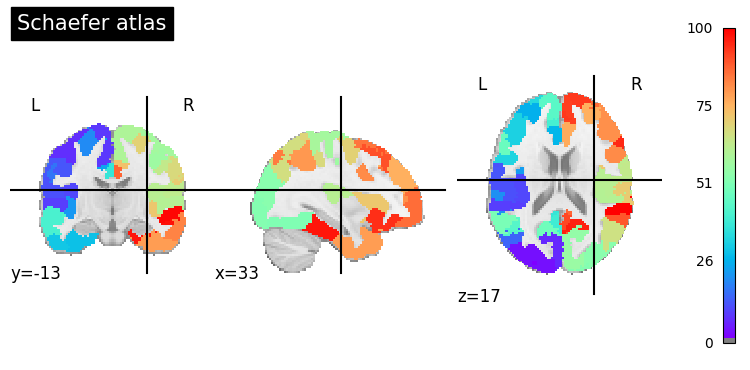

In [ ]:
from nilearn import datasets, plotting

atlas = datasets.fetch_atlas_schaefer_2018(n_rois=100, yeo_networks=17, resolution_mm=2, data_dir='data')
atlas_map = atlas['maps']
roi_labels = atlas['labels']

# Plot the brain rois
plotting.plot_roi(atlas_map, title="Schaefer atlas", cmap = 'rainbow', alpha=1, draw_cross=True, colorbar=True, annotate=True)

# Computing temporal graph

In [31]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def compute_temporal_graphs(ts_data, subject_idx=0, selected_sessions=[0], window_size=100, step_size=10):
    """
    Generate temporal graphs using a sliding window approach for selected sessions.

    Parameters:
    ts_data : ndarray
        Time series data of shape [subjects, sessions, regions, timepoints].
    subject_idx : int
        Index of the subject to process.
    selected_sessions : list
        List of session indices to include in analysis.
    window_size : int
        Size of the sliding window.
    step_size : int
        Step size for the sliding window.

    Returns:
    graphs : list
        List of NetworkX graphs representing functional connectivity over time.
    FC_mats : ndarray
        Functional connectivity matrices for visualization.
    """
    subject_data = ts_data[subject_idx]  # Shape: [sessions, regions, timepoints]

    # Concatenate only the selected session timepoints
    combined_timepoints = np.concatenate([subject_data[s] for s in selected_sessions], axis=1)  # Shape: [regions, selected_timepoints]
    total_timepoints = combined_timepoints.shape[1]

    # Normalize time series to avoid zero correlation issues
    combined_timepoints = (combined_timepoints - np.mean(combined_timepoints, axis=1, keepdims=True)) / np.std(combined_timepoints, axis=1, keepdims=True)

    # Compute the correct number of graphs
    num_graphs = (total_timepoints - window_size) // step_size + 1
    FC_mats = np.zeros((combined_timepoints.shape[0], combined_timepoints.shape[0], num_graphs))

    graphs = []
    graph_idx = 0
    for start in range(0, total_timepoints - window_size + 1, step_size):
        window = combined_timepoints[:, start:start + window_size]  # Shape: [regions, window_size]

        # Compute functional connectivity (Pearson correlation) correctly
        corr_matrix = np.corrcoef(window, rowvar=True)  # Correlation across regions
        np.fill_diagonal(corr_matrix, 0)  # Remove self-connections

        FC_mats[:, :, graph_idx] = corr_matrix  # Store at correct index

        # Create a graph
        G = nx.from_numpy_array(corr_matrix)
        graphs.append(G)

        graph_idx += 1

    return graphs, FC_mats

def visualize_fc_matrices(FC_mats, SS):
    """Visualize functional connectivity matrices for selected timepoints with adjusted color bar length."""
    plt.figure(figsize=(12, 6))
    num_plots = len(SS)
    for s, timepoint in enumerate(SS):
        ax = plt.subplot(1, num_plots, s + 1)
        im = ax.imshow(FC_mats[:, :, timepoint], cmap='jet', vmin=-1, vmax=1)
        ax.set_title(f'Timepoint {timepoint}')

        # Adjust color bar to match graph size
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

    plt.tight_layout()
    plt.show()

selected_sessions = [0]  # Select only session 10
temporal_graphs, FC_mats = compute_temporal_graphs(ts_data, subject_idx=0, selected_sessions=selected_sessions, window_size=100, step_size=10)

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def visualize_fc_matrices(FC_mats, SS):
    """Visualize functional connectivity matrices for selected timepoints with adjusted color bar length."""
    plt.figure(figsize=(12, 6))
    num_plots = len(SS)
    for s, timepoint in enumerate(SS):
        ax = plt.subplot(1, num_plots, s + 1)
        im = ax.imshow(FC_mats[:, :, timepoint], cmap='jet', vmin=-1, vmax=1)
        ax.set_title(f'Timepoint {timepoint}')

        # Adjust color bar to match graph size
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

    plt.tight_layout()
    plt.show()

1101 (92, 92, 1101)


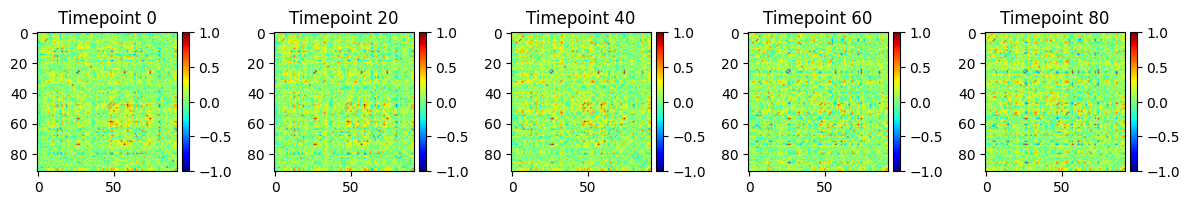

In [ ]:
SS = [0, 20, 40, 60, 80]
print(len(temporal_graphs), FC_mats.shape)
visualize_fc_matrices(FC_mats, SS)

In [ ]:
FC_mats[:, :, 0]

array([[ 0.        ,  0.02253104,  0.21461262, ..., -0.03002459,
         0.09334907,  0.14284688],
       [ 0.02253104,  0.        ,  0.04197265, ..., -0.00742696,
        -0.12679929, -0.17863022],
       [ 0.21461262,  0.04197265,  0.        , ..., -0.28068554,
         0.05075447, -0.09506923],
       ...,
       [-0.03002459, -0.00742696, -0.28068554, ...,  0.        ,
         0.19622616,  0.08585113],
       [ 0.09334907, -0.12679929,  0.05075447, ...,  0.19622616,
         0.        ,  0.48063857],
       [ 0.14284688, -0.17863022, -0.09506923, ...,  0.08585113,
         0.48063857,  0.        ]])

### binary matrices

In [32]:
import numpy as np
import networkx as nx

def compute_binary_temporal_graphs(FC_mats, threshold=0.1):
    """
    Compute binary adjacency matrices from functional connectivity matrices.

    Parameters:
    FC_mats : ndarray
        Functional connectivity matrices over time (shape: [regions, regions, timepoints]).
    threshold : float
        Threshold to binarize the correlation matrix.

    Returns:
    binary_matrices : list
        List of binary adjacency matrices (numpy arrays) over time.
    """
    binary_matrices = []

    for i in range(FC_mats.shape[2]):  # Iterate over time points
        correlation_matrix = FC_mats[:, :, i]

        # Convert to binary adjacency matrix using the threshold
        binary_matrix = (np.abs(correlation_matrix) > threshold).astype(int)

        # Store binary matrix
        binary_matrices.append(binary_matrix)

    return binary_matrices

binary_temporal_graphs = compute_binary_temporal_graphs(FC_mats, threshold=0.4)
binary_temporal_graphs[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [33]:
binary_temporal_graphs_len = len(binary_temporal_graphs)
print(len(binary_temporal_graphs), np.array(binary_temporal_graphs).shape)

111 (111, 92, 92)


## adaptive

In [71]:
import numpy as np
import networkx as nx

# Function to compute novelty index for a single session
def compute_novelty_index(dynfc_matrices):
    novelty_indices = []
    seen_edges = set()

    for matrix in dynfc_matrices:
        current_graph = nx.from_numpy_array(matrix)
        current_edges = set(current_graph.edges())

        new_edges = current_edges - seen_edges
        total_edges = len(current_edges)

        if total_edges > 0:
            novelty_index = len(new_edges) / total_edges
        else:
            novelty_index = 0

        novelty_indices.append(novelty_index)
        seen_edges.update(current_edges)

    # Calculate average novelty index for the session
    average_novelty_index = np.mean(novelty_indices)
    return novelty_indices, average_novelty_index

# Compute novelty index for each session and the average novelty index
novelty_indices_per_session = []
average_novelty_indices = []

session_dynfc_matrices = binary_temporal_graphs
novelty_indices, average_novelty_index = compute_novelty_index(session_dynfc_matrices)

novelty_indices_per_session.append(novelty_indices)
average_novelty_indices.append(average_novelty_index)

# Print results for the current session
print(f"Session {0 + 1}:")
print(f"Novelty Indices: {novelty_indices}")
print(f"Average Novelty Index: {average_novelty_index}\n")

# Print average novelty indices for all sessions
print("Average Novelty Index for Each Session:")
print(average_novelty_indices)

Session 1:
Novelty Indices: [1.0, 0.13008130081300814, 0.23809523809523808, 0.20945945945945946, 0.25157232704402516, 0.171875, 0.22695035460992907, 0.17647058823529413, 0.07027027027027027, 0.11, 0.07035175879396985, 0.17857142857142858, 0.1111111111111111, 0.16143497757847533, 0.06451612903225806, 0.11931818181818182, 0.11855670103092783, 0.17813765182186234, 0.06779661016949153, 0.09787234042553192, 0.06140350877192982, 0.08152173913043478, 0.05670103092783505, 0.08374384236453201, 0.06735751295336788, 0.1043956043956044, 0.10240963855421686, 0.09876543209876543, 0.06470588235294118, 0.041176470588235294, 0.04838709677419355, 0.023809523809523808, 0.05699481865284974, 0.031578947368421054, 0.027777777777777776, 0.07258064516129033, 0.03636363636363636, 0.13559322033898305, 0.06201550387596899, 0.0759493670886076, 0.04201680672268908, 0.06293706293706294, 0.058394160583941604, 0.052941176470588235, 0.03773584905660377, 0.06666666666666667, 0.07834101382488479, 0.04411764705882353, 0.

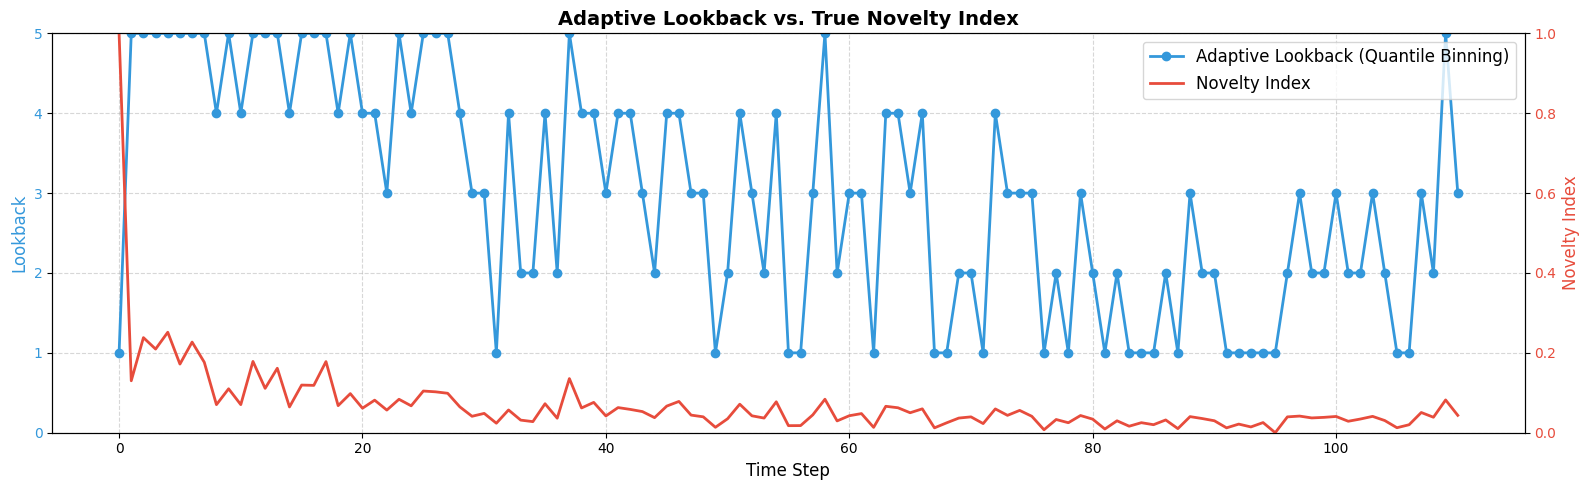

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Ignore the first value
novelty_indices_wo_first = novelty_indices[1:]

# Quantile binning function
def quantile_binning(novelties, min_lookback=1, max_lookback=5):
    novelties = np.array(novelties)
    num_bins = max_lookback - min_lookback + 1
    quantiles = np.quantile(novelties, np.linspace(0, 1, num_bins + 1))

    lookbacks = []
    for n in novelties:
        for i in range(num_bins):
            if quantiles[i] <= n <= quantiles[i + 1]:
                lookbacks.append(min_lookback + i)
                break
    return lookbacks

# Recompute lookbacks
adaptive_lookbacks_wo_first = quantile_binning(novelty_indices_wo_first)
adaptive_lookbacks = [1] + adaptive_lookbacks_wo_first


# Plot using original (unsmoothed) novelty values
fig, ax1 = plt.subplots(figsize=(16, 5))

# Left y-axis: Lookback
ax1.set_xlabel("Time Step", fontsize=12)
ax1.set_ylabel("Lookback", fontsize=12, color="#3498DB")
ax1.plot(adaptive_lookbacks, label="Adaptive Lookback (Quantile Binning)", color="#3498DB", marker="o", linewidth=2)
ax1.tick_params(axis='y', labelcolor="#3498DB")
ax1.set_ylim(0, 5)

# Right y-axis: true novelty values scaled to match visual range
ax2 = ax1.twinx()
ax2.set_ylabel("Novelty Index", fontsize=12, color="#E74C3C")
ax2.plot(np.array(novelty_indices) * 5, label="Novelty Index", color="#E74C3C", linewidth=2)
ax2.set_ylim(0, 5)
ax2_ticks = np.linspace(0, 5, 6)
ax2.set_yticks(ax2_ticks)
ax2.set_yticklabels([f"{tick / 5:.1f}" for tick in ax2_ticks])
ax2.tick_params(axis='y', labelcolor="#E74C3C")

# Title and grid
plt.title("Adaptive Lookback vs. True Novelty Index", fontsize=14, weight='bold')
ax1.grid(True, linestyle='--', alpha=0.5)

# Combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right", fontsize=12)

plt.tight_layout()
plt.show()

# Model

## TransformerG2G

In [73]:
import itertools
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import torch.nn.utils as torch_utils
import numpy as np
import math
from sklearn.model_selection import KFold

# Define attention utilities
def a_norm(Q, K):
    m = torch.matmul(Q, K.transpose(2, 1).float())
    m /= torch.sqrt(torch.tensor(Q.shape[-1]).float())
    return torch.softmax(m, -1)

def attention(Q, K, V):
    a = a_norm(Q, K)
    return torch.matmul(a, V)

# Define attention block
class AttentionBlock(nn.Module):
    def __init__(self, dim_val, dim_attn):
        super(AttentionBlock, self).__init__()
        self.value = nn.Linear(dim_val, dim_val)
        self.key = nn.Linear(dim_val, dim_attn)
        self.query = nn.Linear(dim_val, dim_attn)

    def forward(self, x, kv=None):
        if kv is None:
            return attention(self.query(x), self.key(x), self.value(x))
        else:
            return attention(self.query(x), self.key(kv), self.value(kv))

class Value(nn.Module):
    def __init__(self, dim_val):
        super(Value, self).__init__()
        self.fc = nn.Linear(dim_val, dim_val, bias=False)

    def forward(self, x):
        return self.fc(x)

class Key(nn.Module):
    def __init__(self, dim_val, dim_attn):
        super(Key, self).__init__()
        self.fc = nn.Linear(dim_val, dim_attn, bias=False)

    def forward(self, x):
        return self.fc(x)

class Query(nn.Module):
    def __init__(self, dim_val, dim_attn):
        super(Query, self).__init__()
        self.fc = nn.Linear(dim_val, dim_attn, bias=False)

    def forward(self, x):
        return self.fc(x)

# Define PositionalEncoding module
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.2, max_len=5000):
        super(PositionalEncoding, self).__init__()

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)

        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0).transpose(0, 1)

        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(1), :].squeeze(1)
        return x

# Define encoder layer
class EncoderLayer(nn.Module):
    def __init__(self, dim_val, dim_attn, n_heads=1):
        super(EncoderLayer, self).__init__()
        self.attn = AttentionBlock(dim_val, dim_attn)
        self.fc1 = nn.Linear(dim_val, dim_val)
        self.dropout = nn.Dropout(p=0.2)  # Add dropout layer
        self.fc2 = nn.Linear(dim_val, dim_val)
        self.norm1 = nn.LayerNorm(dim_val)
        self.norm2 = nn.LayerNorm(dim_val)

    def forward(self, x):
        a = self.attn(x)
        x = self.norm1(x + a)
        x = self.dropout(x)  # Apply dropout
        a = self.fc1(F.elu(self.fc2(x)))
        x = self.norm2(x + a)
        return x

# Define energy function for KL divergence
def Energy_KL(mu, sigma, pairs, L):
    ij_mu = mu[pairs]
    ij_sigma = sigma[pairs]

    sigma_ratio = ij_sigma[:, 1] / ij_sigma[:, 0]
    trace_fac = torch.sum(sigma_ratio, 1)
    log_det = torch.sum(torch.log(sigma_ratio + 1e-14), 1)
    mu_diff_sq = torch.sum(torch.square(ij_mu[:, 0] - ij_mu[:, 1]) / ij_sigma[:, 0], 1)
    return 0.5 * (trace_fac + mu_diff_sq - L - log_det)

# Define loss function
def build_loss(triplets, scale_terms, mu, sigma, L, scale):
    hop_pos = torch.stack([torch.tensor(triplets[:, 0]), torch.tensor(triplets[:, 1])], 1).type(torch.int64)
    hop_neg = torch.stack([torch.tensor(triplets[:, 0]), torch.tensor(triplets[:, 2])], 1).type(torch.int64)
    eng_pos = Energy_KL(mu, sigma, hop_pos, L)
    eng_neg = Energy_KL(mu, sigma, hop_neg, L)
    energy = torch.square(eng_pos) + torch.exp(-eng_neg)
    if scale:
        loss = torch.mean(energy * torch.Tensor(scale_terms).cpu())
    else:
        loss = torch.mean(energy)
    return loss

# Define Graph2Gauph model
class Graph2Gauss_Torch(nn.Module):
    def __init__(self, dim_val, dim_attn, dim_in, dim_out, n_encoder_layers=1, n_heads=1, lookback=1, dropout=0.2):
        super(Graph2Gauss_Torch, self).__init__()
        self.D = 256
        self.elu = nn.ELU()

        self.encs = nn.ModuleList()
        for _ in range(n_encoder_layers):
            self.encs.append(EncoderLayer(dim_val, dim_attn, n_heads))

        self.pos = PositionalEncoding(dim_val,max_len=5000)
        self.dropout = nn.Dropout(p=0.2)

        self.enc_input_fc = nn.Linear(dim_in, dim_val)
        self.out_fc = nn.Linear(dim_val * (lookback + 1), self.D) #After the encoder layer, the vectors are passed through a nonlinear projection layer
        self.sigma_fc = nn.Linear(self.D, dim_out)
        self.mu_fc = nn.Linear(self.D, dim_out)

    def forward(self, input):
        e = self.encs[0](self.pos(self.enc_input_fc(input)))
        for enc in self.encs[1:]:
            e = enc(e)

        x = torch.tanh(self.out_fc(e.flatten(start_dim=1)))
        x = self.dropout(x)  # Apply dropout
        mu = self.mu_fc(x)
        sigma = self.sigma_fc(x)
        sigma = self.elu(sigma) + 1 + 1e-14

        return x, mu, sigma

# Prepare data function
def prepare_data(dynfc_matrices, lookback):
    dataset = {}
    hop_dict = {}
    scale_terms_dict = {}
    triplet_dict = {}
    scale_dict = {}

    num_windows, num_nodes, _ = dynfc_matrices.shape

    for i in range(lookback, num_windows):
        B = np.zeros((num_nodes, lookback + 1, num_nodes))
        for j in range(lookback + 1):
            adj_matr = dynfc_matrices[i - lookback + j]
            B[:, j, :] = adj_matr
        dataset[i] = B

    for i in range(lookback, num_windows):
        hops = get_hops(dynfc_matrices[i], lookback) #!!!!
        scale_terms = {h if h != -1 else max(hops.keys()) + 1:
                       hops[h].sum(1) if h != -1 else hops[1].shape[0] - hops[h].sum(1)
                       for h in hops}
        hop_dict[i] = hops
        scale_terms_dict[i] = scale_terms

        triplet, scale = to_triplets(sample_all_hops(hop_dict[i]), scale_terms_dict[i])
        triplet_dict[i] = triplet
        scale_dict[i] = scale

    return dataset, hop_dict, scale_terms_dict, triplet_dict, scale_dict

def prepare_data_adaptive(dynfc_matrices, adaptive_lookbacks):
    dataset = {}
    hop_dict = {}
    scale_terms_dict = {}
    triplet_dict = {}
    scale_dict = {}

    num_windows, num_nodes, _ = dynfc_matrices.shape

    for i in range(len(adaptive_lookbacks)):
        lookback = adaptive_lookbacks[i]
        if i < lookback:
            continue

        B = np.zeros((num_nodes, lookback + 1, num_nodes))
        for j in range(lookback + 1):
            B[:, j, :] = dynfc_matrices[i - lookback + j]
        dataset[i] = B

        hops = get_hops(dynfc_matrices[i], lookback)
        scale_terms = {
            h if h != -1 else max(hops.keys()) + 1:
            hops[h].sum(1) if h != -1 else hops[1].shape[0] - hops[h].sum(1)
            for h in hops
        }

        hop_dict[i] = hops
        scale_terms_dict[i] = scale_terms

        triplet, scale = to_triplets(sample_all_hops(hop_dict[i]), scale_terms_dict[i])
        triplet_dict[i] = triplet
        scale_dict[i] = scale

    return dataset, hop_dict, scale_terms_dict, triplet_dict, scale_dict

# Define function to sample last hop
def sample_last_hop(dynfc_matrices, nodes):
    num_windows, num_nodes, _ = dynfc_matrices.shape
    sampled = np.random.randint(0, num_nodes, len(nodes))
    for window_idx in range(num_windows):
        window_matrix = dynfc_matrices[window_idx]
        nnz = np.nonzero(window_matrix[nodes, sampled])[0]
        while len(nnz) != 0:
            new_sample = np.random.randint(0, num_nodes, len(nnz))
            sampled[nnz] = new_sample
            nnz = np.nonzero(window_matrix[nnz, new_sample])[0]
    return sampled

# Define function to sample all hops
def sample_all_hops(hops, nodes=None):
    N = hops[1].shape[0]
    if nodes is None:
        nodes = np.arange(N)
    sampled_nodes = []
    for node in nodes:
        node_samples = [node]
        for h in hops.keys():
            if h != -1:
                if len(hops[h]) == 0:
                    node_samples.append(-1)
                else:
                    node_samples.append(np.random.choice(hops[h][node]))
        node_samples.append(np.random.randint(0, N))
        sampled_nodes.append(node_samples)
    return np.array(sampled_nodes)

# Define function to get hops
def get_hops(dynfc_matrices, K=2):
    num_windows, num_nodes = dynfc_matrices.shape
    hops = {1: dynfc_matrices.copy(), -1: dynfc_matrices.copy()}
    np.fill_diagonal(hops[1], 0)
    for h in range(2, K + 1):
        next_hop = np.dot(hops[h - 1], dynfc_matrices)
        next_hop[next_hop > 0] = 1
        for prev_h in range(1, h):
            next_hop -= np.multiply(next_hop, hops[prev_h])
        np.fill_diagonal(next_hop, 0)
        hops[h] = next_hop
        hops[-1] += next_hop
    return hops

# Define function to convert to triplets
def to_triplets(sampled_nodes, scale_terms):
    triplets = []
    triplet_scale_terms = []
    for i, j in itertools.combinations(np.arange(1, sampled_nodes.shape[1]), 2):
        triplet = sampled_nodes[:, [0] + [i, j]]
        triplet = triplet[(triplet[:, 1] != -1) & (triplet[:, 2] != -1)]
        triplet = triplet[(triplet[:, 0] != triplet[:, 1]) & (triplet[:, 0] != triplet[:, 2])]
        triplets.append(triplet)
        triplet_scale_terms.append(scale_terms[i][triplet[:, 1]] * scale_terms[j][triplet[:, 2]])
    return np.row_stack(triplets), np.concatenate(triplet_scale_terms)


## training

In [74]:
# Define hyperparameters
dim_out = 64
dim_in  = 92
dim_val = 256
dim_attn = 256
lr = 1e-8 #initial learning rate
n_heads = 1
n_encoder_layers = 1
lookback = adaptive_lookbacks[1]
epochs = 245
dropout=0.2
weight_decay=0.01

original_data = np.array(binary_temporal_graphs)

# Prepare data
# dataset, hop_dict, scale_terms_dict, triplet_dict, scale_dict = prepare_data(np.array(binary_temporal_graphs), lookback)
dataset, hop_dict, scale_terms_dict, triplet_dict, scale_dict = prepare_data_adaptive(original_data, adaptive_lookbacks)

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


train_size = int(0.7 * binary_temporal_graphs_len)  # 77 samples for training
val_size = int(0.2 * binary_temporal_graphs_len)  # 22 samples for validation
test_size = binary_temporal_graphs_len - train_size - val_size  # 12 samples for testing
train_val_gap_size = 0  # No gap needed

# Compute new indices
train_end = lookback + train_size
val_start = train_end
val_end = val_start + val_size
test_start = val_end
test_end = binary_temporal_graphs_len

# Define training, validation, and test datasets
train_data = {i: torch.tensor(dataset[i], dtype=torch.float32).to(device) for i in range(lookback, train_end)}
val_data = {i: torch.tensor(dataset[i], dtype=torch.float32).to(device) for i in range(val_start, val_end)}
test_data = {i: torch.tensor(dataset[i], dtype=torch.float32).to(device) for i in range(test_start, test_end)}

# Print confirmation
print(f"Training Data: {lookback} to {train_end}")
print(f"Validation Data: {val_start} to {val_end}")
print(f"Test Data: {test_start} to {test_end}")

Training Data: 5 to 82
Validation Data: 82 to 104
Test Data: 104 to 111


### grid search

In [37]:
def train_model_with_scheduler_and_early_stopping(t, optimizer, scheduler, train_data, val_data, triplet_dict, scale_dict, epochs, weight_decay, device, patience):
    loss_mainlist = []
    val_mainlist = []

    # Early stopping variables
    best_val_loss = float('inf')
    early_stopping_counter = 0

    for e in range(epochs):
        loss_list = []
        t.train()
        #for i in range(len(train_data)):
        for i in train_data.keys():
            #triplet, scale = triplet_dict[i], scale_dict[i]
            triplet, scale = to_triplets(sample_all_hops(hop_dict[i]), scale_terms_dict[i])
            optimizer.zero_grad()
            inputs = train_data[i]
            _, mu, sigma = t(inputs)
            loss = build_loss(triplet, scale, mu, sigma, 64, scale=False)

            l2_reg = torch.tensor(0., device=device)
            for param in t.parameters():
                l2_reg += torch.norm(param, p=2)
            loss += weight_decay * l2_reg

            loss_list.append(loss.item())
            loss.backward()
            torch.nn.utils.clip_grad_norm_(t.parameters(), max_norm=1.0)
            optimizer.step()

        t.eval()
        val_loss_value = 0.0
        val_samples = 0
        #for i in range(len(val_data)):
        for i in val_data.keys():
            #triplet, scale = triplet_dict[i], scale_dict[i]
            triplet, scale = to_triplets(sample_all_hops(hop_dict[i]), scale_terms_dict[i])
            inputs = val_data[i]
            _, mu, sigma = t(inputs)
            val_loss_value += build_loss(triplet, scale, mu, sigma, 64, scale=False).item()
            val_samples += 1
        val_loss_value /= val_samples

        loss_mainlist.append(np.mean(loss_list))
        val_mainlist.append(val_loss_value)
        print(f"Epoch: {e}, Average Training Loss: {loss_mainlist[-1]}, Validation Loss: {val_mainlist[-1]}")

        scheduler.step(val_loss_value)

        # Early stopping logic
        if val_loss_value < best_val_loss:
            best_val_loss = val_loss_value
            early_stopping_counter = 0
            # Save the best model
            torch.save(t.state_dict(), '/content/best_trained_model.pth')
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= patience:
                print("Early stopping triggered")
                break

    return loss_mainlist, val_mainlist

In [39]:
from itertools import product
import torch
import numpy as np

# Define parameter grid
param_grid = {
    'lr': [1e-2, 1e-3, 1e-4],
    'weight_decay': [1e-3, 1e-4],
    'dropout': [0.1, 0.3, 0.5]
}

# Tracking best result
best_config = None
best_val_loss = float('inf')

# Grid search over all combinations
for lr, weight_decay, dropout in product(param_grid['lr'], param_grid['weight_decay'], param_grid['dropout']):
    print(f"\nTrying config: lr={lr}, weight_decay={weight_decay}, dropout={dropout}")

    # Re-initialize model
    t = Graph2Gauss_Torch(dim_val, dim_attn, dim_in, dim_out, n_encoder_layers, n_heads, lookback, dropout).to(device)
    t.pos = PositionalEncoding(dim_val, dropout=dropout, max_len=5000).to(device)

    # Separate L2 params
    l2_params = [param for name, param in t.named_parameters() if 'fc' in name]
    other_params = [param for name, param in t.named_parameters() if 'fc' not in name]

    optimizer = Adam([
        {'params': l2_params, 'weight_decay': weight_decay},
        {'params': other_params}
    ], lr=lr)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.1, patience=5, min_lr=1e-8
    )

    # Train
    patience = 10
    train_losses, val_losses = train_model_with_scheduler_and_early_stopping(
        t, optimizer, scheduler, train_data, val_data,
        triplet_dict, scale_dict, epochs, weight_decay, device, patience
    )

    final_val_loss = val_losses[-1]
    print(f"Finished config - Final Validation Loss: {final_val_loss:.6f}")

    if final_val_loss < best_val_loss:
        best_val_loss = final_val_loss
        best_config = {
            'lr': lr,
            'weight_decay': weight_decay,
            'dropout': dropout
        }
        torch.save(t.state_dict(), './best_grid_model.pth')

print("\n✅ Best configuration found:")
print(best_config)
print(f"Best Validation Loss: {best_val_loss:.6f}")



Trying config: lr=0.01, weight_decay=0.001, dropout=0.1
Epoch: 0, Average Training Loss: 1.692735079821054, Validation Loss: 0.9999999376860532
Epoch: 1, Average Training Loss: 1.0001425394764194, Validation Loss: 1.0000000325116245
Epoch: 2, Average Training Loss: 0.9510437273359919, Validation Loss: 0.9999997344884005
Epoch: 3, Average Training Loss: 0.9442521457548265, Validation Loss: 0.9999958656050942
Epoch: 4, Average Training Loss: 0.957658300926159, Validation Loss: 0.999999157407067
Epoch: 5, Average Training Loss: 0.9356503207962235, Validation Loss: 0.9997894980690696
Epoch: 6, Average Training Loss: 0.933242500602425, Validation Loss: 0.999511260877956
Epoch: 7, Average Training Loss: 0.930310989355112, Validation Loss: 0.9993662942539562
Epoch: 8, Average Training Loss: 0.9048927991421192, Validation Loss: 0.9999985613606193
Epoch: 9, Average Training Loss: 0.9116528483180256, Validation Loss: 0.9999993714419279
Epoch: 10, Average Training Loss: 0.9161293731107341, Valid

In [75]:
# Define optimizer
t = Graph2Gauss_Torch(dim_val, dim_attn, dim_in, dim_out, n_encoder_layers, n_heads, lookback, dropout).to(device)
t.pos = PositionalEncoding(dim_val, dropout=0.2, max_len=5000).to(device)
# Filter parameters for L2 regularization
l2_params = [param for name, param in t.named_parameters() if 'fc' in name]

# Define parameters excluding those for L2 regularization
other_params = [param for name, param in t.named_parameters() if 'fc' not in name]

# Define optimizer with two parameter groups
optimizer = Adam([
    {'params': l2_params, 'weight_decay': weight_decay},  # Group for L2 regularization
    {'params': other_params}  # Group for other parameters
], lr=lr)

#optimizer = Adam(t.parameters(), lr=lr, weight_decay=0.01)

# Learning rate scheduling
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5,min_lr=1e-8)


# Train the model with the new configurations
import time
start = time.time()
# Example usage with early stopping patience of 10 epochs
patience = 10
train_losses, val_losses = train_model_with_scheduler_and_early_stopping(t, optimizer, scheduler, train_data, val_data, triplet_dict, scale_dict, epochs, weight_decay, device, patience)
print("Time taken: ", time.time() - start)
# Save the trained model in Google Colab
torch.save(t.state_dict(), './trained_model.pth')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (92x1280 and 1536x256)

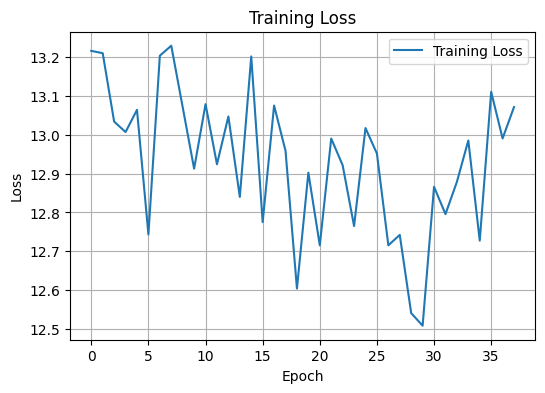

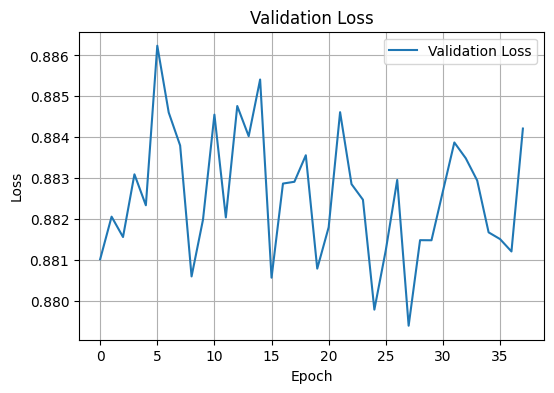

In [51]:
import matplotlib.pyplot as plt

# Plotting training loss curve
plt.figure(figsize=(6, 4))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting validation loss curve
plt.figure(figsize=(6, 4))
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


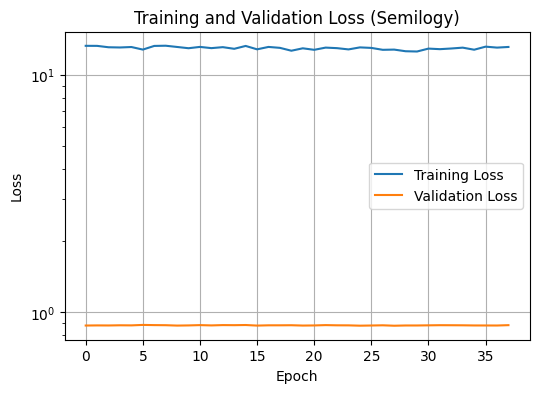

In [52]:
import matplotlib.pyplot as plt

# Plotting train and validation loss curves on a semilogy scale
plt.figure(figsize=(6, 4))
plt.semilogy(train_losses, label='Training Loss')
plt.semilogy(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Semilogy)')
plt.legend()
plt.grid(True)
plt.show()


## testing

In [68]:
# Define the training, validation, and test data
test_data = {i: torch.tensor(dataset[i], dtype=torch.float32).to(device) for i in range(test_start, test_end)}

# Load the trained model
t = Graph2Gauss_Torch(dim_val, dim_attn, dim_in, dim_out, n_encoder_layers, n_heads, lookback, dropout).to(device)

t.load_state_dict(torch.load('/content/best_trained_model.pth'))
t.eval()  # Set the model to evaluation mode

# Evaluate the model on the test dataset
test_loss_value = 0.0
test_samples = 0

with torch.no_grad():  # Disable gradient calculation for evaluation
    for i in test_data.keys():
        triplet, scale = to_triplets(sample_all_hops(hop_dict[i]), scale_terms_dict[i])
        inputs = test_data[i]
        _, mu, sigma = t(inputs)
        test_loss_value += build_loss(triplet, scale, mu, sigma, 64, scale=False).item()
        test_samples += 1

test_loss_value /= test_samples
print(f"Test Loss: {test_loss_value}")


Test Loss: 0.8860302766164144


In [69]:
# Define different percentage splits of the test data
percentage_splits = [1]


print(f"Length of test_data: {len(test_data)}")
# print(f"Length of test_data_subset: {len(test_data_subset)}")

for percentage in percentage_splits:
    # Calculate the number of data points for this percentage split
    num_data_points = int((test_end - test_start) * percentage)
    # Create a subset of the test data based on the calculated number of data points
    test_data_subset = {i: test_data[i] for i in range(test_start, test_start + num_data_points)}

    # Evaluate the model on the subset of test data
    test_loss_value = 0.0
    test_samples = 0

    with torch.no_grad():  # Disable gradient calculation for evaluation
        for i in test_data_subset.keys():
            # Ensure `i` is correctly used to access corresponding `hop_dict` and `scale_terms_dict` entries
            index = i
            triplet, scale = to_triplets(sample_all_hops(hop_dict[index]), scale_terms_dict[index])
            inputs = test_data_subset[i]
            _, mu, sigma = t(inputs)
            test_loss_value += build_loss(triplet, scale, mu, sigma, 64, scale=False).item()
            test_samples += 1

    test_loss_value /= test_samples
    print(f"Test Loss for {percentage * 100}% of test data: {test_loss_value}")


Length of test_data: 9
Test Loss for 100% of test data: 0.8871756858295865


### yiran

In [70]:
import numpy as np
from sklearn.metrics import precision_recall_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
from imblearn.over_sampling import RandomOverSampler
warnings.filterwarnings("ignore")

def evaluate_once(test_data, binary_temporal_graphs, model, device):
    # Lists to collect embeddings and labels
    embeddings_list = []
    labels_list = []

    for i in test_data.keys():
        inputs = test_data[i]
        with torch.no_grad():
            _, embeddings, _ = model(inputs.to(device))
        embeddings_flat = embeddings.cpu().numpy().reshape(-1, embeddings.shape[-1])
        embeddings_list.append(embeddings_flat)
        ground_truth = np.array(binary_temporal_graphs)[i].astype(int)
        labels_list.append(ground_truth.flatten())

    embeddings_array = np.concatenate(embeddings_list, axis=0)
    labels_array = np.concatenate(labels_list, axis=0)
    labels_array = labels_array[:embeddings_array.shape[0]]

    # Train MLP
    # param_grid = {
    #     'hidden_layer_sizes': [(100, 50), (150, 75)],
    #     'activation': ['relu'],
    #     'solver': ['adam'],
    #     'learning_rate': ['constant', 'adaptive'],
    #     'max_iter': [200, 300],
    # }

    ros = RandomOverSampler(random_state=42)
    embeddings_array_balanced, labels_array_balanced = ros.fit_resample(embeddings_array, labels_array)

    mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=123)
    mlp_classifier.fit(embeddings_array_balanced, labels_array_balanced)
    # # Initialize GridSearchCV
    # mlp_classifier = MLPClassifier(random_state=123)
    # grid_search = GridSearchCV(mlp_classifier, param_grid, cv=3, scoring='f1', n_jobs=-1)

    # grid_search.fit(embeddings_array, labels_array)
    # # Get the best estimator
    # best_mlp_classifier = grid_search.best_estimator_

    # --- MAP Evaluation ---
    AP_list = []
    for i in test_data.keys():
        inputs = test_data[i]
        with torch.no_grad():
            _, embeddings, _ = model(inputs.to(device))
        embeddings_flat = embeddings.cpu().numpy().reshape(-1, embeddings.shape[-1])
        predictions_flat = mlp_classifier.predict_proba(embeddings_flat)[:, 1]
        ground_truth_flat = np.array(binary_temporal_graphs)[i].astype(int).flatten()
        ground_truth_flat = ground_truth_flat[:predictions_flat.shape[0]]
        precision, recall, _ = precision_recall_curve(ground_truth_flat, predictions_flat)
        AP = auc(recall, precision)
        AP_list.append(AP)
    MAP_value = np.mean(AP_list)

    # --- MRR Evaluation ---
    RR_list = []
    for i in test_data.keys():
        inputs = test_data[i]
        with torch.no_grad():
            _, embeddings, _ = model(inputs.to(device))
        embeddings_flat = embeddings.cpu().numpy().reshape(-1, embeddings.shape[-1])
        predictions_flat = mlp_classifier.predict_proba(embeddings_flat)[:, 1]
        ground_truth_flat = np.array(binary_temporal_graphs)[i].astype(int).flatten()
        true_indices = np.where(ground_truth_flat == 1)[0]

        if len(true_indices) == 0:
            RR_list.append(0.0)
        else:
            sorted_indices = np.argsort(predictions_flat)[::-1]
            for rank, idx in enumerate(sorted_indices, 1):
                if idx in true_indices:
                    RR_list.append(1.0 / rank)
                    break
            else:
                RR_list.append(0.0)
    MRR_value = np.mean(RR_list)

    return MAP_value, MRR_value

# ==== Run 5 times and collect results ====

t = Graph2Gauss_Torch(dim_val, dim_attn, dim_in, dim_out, n_encoder_layers, n_heads, lookback, dropout).to(device)
t.load_state_dict(torch.load('/content/best_trained_model.pth'))
t.eval()  # Set the model to evaluation mode

num_runs = 5
MAP_scores = []
MRR_scores = []
import time
start = time.time()
for run in range(num_runs):
    print(f"Run {run+1}...")
    MAP, MRR = evaluate_once(test_data, binary_temporal_graphs, t, device)
    MAP_scores.append(MAP)
    MRR_scores.append(MRR)

# ==== Final report ====
MAP_scores = np.array(MAP_scores)
MRR_scores = np.array(MRR_scores)

print(f"\n==== Final Results over {num_runs} runs ====")
print(f"MAP: Mean = {MAP_scores.mean():.4f}, Variance = {MAP_scores.var():.6f}")
print(f"MRR: Mean = {MRR_scores.mean():.4f}, Variance = {MRR_scores.var():.6f}")
print("Time taken: ", time.time() - start)




Run 1...
Run 2...
Run 3...
Run 4...
Run 5...

==== Final Results over 5 runs ====
MAP: Mean = 0.3435, Variance = 0.000000
MRR: Mean = 0.6056, Variance = 0.000000
Time taken:  13.120116233825684


### rupsa

In [57]:
padded_graphs = np.array(binary_temporal_graphs)

In [58]:
import numpy as np
import torch
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

t = Graph2Gauss_Torch(dim_val, dim_attn, dim_in, dim_out, n_encoder_layers, n_heads, lookback, dropout).to(device)
t.load_state_dict(torch.load('/content/best_trained_model.pth'))
t.eval()  # Set the model to evaluation mode

# Define a list to store MAP and MRR values for each test split ratio
MAP_values = []
MRR_values = []

test_split_ratios = [1]

# Extract features from dynfc_matrices
# features = dynfc_matrices.reshape(dynfc_matrices.shape[0], -1)

# # Initialize ground truth
# ground_truth = dynfc_matrices.astype(int)
# ground_truth_adjusted = ground_truth.reshape(-1, 1)

# # Use only the first 1200 samples for training
# X_train = features[:1200]
# y_train = ground_truth_adjusted[:1200].ravel()
embeddings_list = []
labels_list = []

from typing import List
import numpy as np


for i in train_data.keys():
    inputs = train_data[i]
    with torch.no_grad():
        _, embeddings, _ = t(inputs.to(device))
    embeddings_flat = embeddings.cpu().numpy().reshape(-1, embeddings.shape[-1])
    embeddings_list.append(embeddings_flat)
    ground_truth = padded_graphs[i].astype(int)
    labels_list.append(ground_truth.flatten())

embeddings_array = np.concatenate(embeddings_list, axis=0)
labels_array = np.concatenate(labels_list, axis=0)
labels_array = labels_array[:embeddings_array.shape[0]]

# Balance positive and negative samples in the training set
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(embeddings_array, labels_array)

# Iterate over each test split ratio
for test_split_ratio in test_split_ratios:
    # num_data_points = int((3401 - 2401) * test_split_ratio)
    # test_data_subset = {i: test_data[i] for i in range(2401, 2401 + num_data_points)}

    # Initialize MLP classifier
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=123)

    # Split the features and ground truth into test sets
    # X_test = features[2401:2401 + num_data_points]
    # y_test = ground_truth_adjusted[2401:2401 + num_data_points].ravel()
    embeddings_list = []
    labels_list = []

    for i in test_data.keys():
        inputs = test_data[i]
        with torch.no_grad():
            _, embeddings, _ = t(inputs.to(device))
        embeddings_flat = embeddings.cpu().numpy().reshape(-1, embeddings.shape[-1])
        embeddings_list.append(embeddings_flat)
        ground_truth = padded_graphs[i].astype(int)
        labels_list.append(ground_truth.flatten())

    embeddings_array = np.concatenate(embeddings_list, axis=0)
    labels_array = np.concatenate(labels_list, axis=0)
    labels_array = labels_array[:embeddings_array.shape[0]]

    # Fit MLP classifier
    mlp_classifier.fit(X_train_balanced, y_train_balanced)

    # Predict probabilities for the positive class
    y_proba = mlp_classifier.predict_proba(embeddings_array)[:, 1]

    # Compute precision-recall curve and area under the curve
    precision, recall, _ = precision_recall_curve(labels_array, y_proba)
    MAP_value = auc(recall, precision)
    MAP_values.append(MAP_value)

    # Initialize list to store reciprocal ranks
    RR_list_gnn = []

    # Evaluate MRR using GNN predictions
    for i in test_data.keys():
        inputs = test_data[i]

        # Forward pass through the GNN model
        with torch.no_grad():
            _, mu_pred, sigma_pred = t(inputs.to(device))

        # Extract predictions from the GNN model
        predictions_gnn = mu_pred.cpu().numpy()

        # Compute reciprocal rank for each sample using GNN predictions
        RR_sample_list_gnn = []
        for j in range(predictions_gnn.shape[0]):
            true_indices = np.where(ground_truth[j].flatten() == 1)[0]
            sorted_indices = np.argsort(predictions_gnn[j].flatten())[::-1]

            for idx in sorted_indices:
                if idx in true_indices:
                    RR = 1 / (sorted_indices.tolist().index(idx) + 1)
                    RR_sample_list_gnn.append(RR)
                    break

        # Append reciprocal ranks for the current sample
        RR_list_gnn.extend(RR_sample_list_gnn)

    # Compute MRR for the current test split ratio
    MRR_value_gnn = np.mean(RR_list_gnn)
    MRR_values.append(MRR_value_gnn)

# Print MAP and MRR values for all test split ratios
for i, test_split_ratio in enumerate(test_split_ratios):
    print(f"Test Split Ratio: {test_split_ratio}, MAP: {MAP_values[i]}, MRR: {MRR_values[i]}")

Test Split Ratio: 1, MAP: 0.04269568321153054, MRR: 0.1264793932437953
